## Vector Orientation, Coordinates and Products

We now make the jump from two to three dimensions, i.e., from $\maR^2$ to $\maR^3$. As in the plane we express vectors in Cartesian and/or Polar coordinates as the situation demands. We move beyond the inner product to consider **outer** and **cross** products. These are the fundamental ingredients of rotations in space as well the origin of two new types of transformations; projections and skew matrices. The cross product also leads to a geometric notion of **determinant** of space transformations which in turn leads to the notion, and test for, **linear independence** of sets of vectors in space. 

We begin with the illustration of a vector $a=(a_x,a_y,a_z)$ in space with respect to a given right-handed orthogonal coordinate system $(e_x,e_y,e_z)$. **Orthogonal** means that the vectors are mutually perpendicular, while **right-handed** means that if, with your right hand, you align your index finger with $e_x$ and your middle finger with $e_y$ then your thumb will align with $e_z$. For example,

\begin{equation}\label{eq:aE}
 a = a_xe_x + a_ye_y + a_ze_z, \where e_x = \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix}, \hskip 0.3in
   e_y = \begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.3in e_z = \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{equation}


We introduce the **spherical coordinates**

\begin{equation}\label{eq:scon}
  \eqalign{
  \theta &= \hbox{ polar angle } = \angle(e_z,a), \hskip 0.5in 0\le\theta<\pi \cr
  \phi &= \hbox{ azimuthal angle } = \angle(e_x,a^{\flat}), \hskip 0.5in 0\le\phi<2\pi \cr
  r &= \hbox{ magnitude } = \|a\| = \sqrt{a_x^2+a_y^2+a_z^2}, \cr}
\end{equation}

where $a^{\flat}=(a_x,a_y,0)$ is the flattening of $a$ into the $(e_x,e_y)$ plane. In these coordinates, our $a$ vector is expressed as

\begin{equation}\label{eq:ascon}
  \eqalign{
  a_x &= r\sin(\theta)\cos(\phi) \cr
  a_y &= r\sin(\theta)\sin(\phi) \cr
  a_z &= r\cos(\theta) \cr}
\end{equation}

and illustrated in Figure \ref{fig:ascon}.

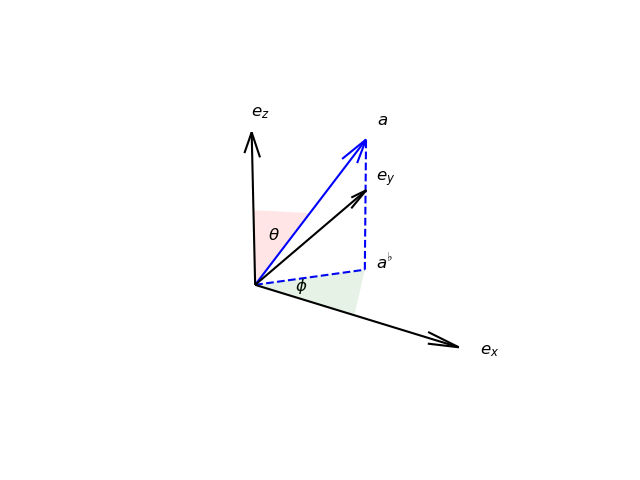

In [8]:
# spherical coordinates
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

theta = np.pi/6
phi = np.pi/4
r = 2
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

ax.quiver(0,0,0,x,y,z, colors='b', arrow_length_ratio=.15)
ax.text3D(1.1*x, 1.1*y, 1.1*z, '$a$', fontsize=12)

ex = np.array([2,0,0])
ey = np.array([0,2,0])
ez = np.array([0,0,2])
ax.quiver([0,0,0],[0,0,0],[0,0,0],ex,ey,ez, colors='k', arrow_length_ratio=.15)

tex = 1.1*ex
ax.text3D(tex[0], tex[1], tex[2], '$e_x$', fontsize=12)
tey = 1.1*ey
ax.text3D(tey[0], tey[1], tey[2], '$e_y$', fontsize=12)
tez = 1.1*ez
ax.text3D(tez[0], tez[1], tez[2], '$e_z$', fontsize=12)

ax.plot3D([0, x], [0, y], [0,0], 'b--')
ax.text3D(1.1*x, 1.1*y, 0, '$a^{\\flat}$', fontsize=12)
ax.plot3D([x, x], [y, y], [0,z], 'b--')

ax.text3D(x/8, y/8, z/3, '$\\theta$', fontsize=12)
ax.text3D(x/2, y/8, 0, '$\phi$', fontsize=12)

# paint the theta sector
Bx = [0, x/2, ez[0]/2]   
By = [0, y/2, ez[1]/2]    
Bz = [0, z/2, ez[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# paint the phi sector
Bx = [0, x, ex[0]/2]   
By = [0, y, ex[1]/2]    
Bz = [0, 0, ex[2]/2]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'g', alpha = 0.1))

ax.set_xlim(-0.5,1.5)
ax.set_ylim(-0.5,1.5)
ax.set_zlim(-0.5,1.5)

plt.axis('off')
plt.show();

\begin{myfig}\label{fig:ascon} Representation of $a\in\maR^3$ in terms of its **polar angle**, $\theta$, (pink span) **azimuthal angle**, $\phi$, (green span) and **magnitude**, $r$. Please rotate, zoom, and repeat. \end{myfig}

To begin we note the **inner product** of two space vectors remains the sum of their element-wise products. That is

\begin{equation*}
  a^Tb = \begin{bmatrix} a[0] & a[1] & a[2] \end{bmatrix}\begin{bmatrix} b[0] \\ b[1] \\ b[2] \end{bmatrix}
    = a[0]b[0] + a[1]b[1] + a[2]b[2].
\end{equation*}

In addition, the norm of $a$ remains $\|a\|\equiv (a^Ta)^{1/2}$ and the inner product still obeys 

\begin{equation}\label{eq:CSE}
  a^Tb = \|a\|\|b\|\cos(\theta)
\end{equation}

where $\theta\equiv\angle(a,b)$ is the angle from $a$ and $b$ in the plane spanned by $a$ and $b$.

The word **inner** here is used by contrast with the **outer product**

\begin{equation}\label{eq:OutProd}
     ab^T = \begin{bmatrix} a[0] \\ a[1] \\ a[2] \end{bmatrix}\begin{bmatrix} b[0] & b[1] & b[2] \end{bmatrix}
     = \begin{bmatrix} a[0]b[0] & a[0]b[1] & a[0]b[2] \\ a[1]b[0] & a[1]b[1] & a[1]b[2] \\ a[2]b[0] & a[2]b[1] & a[2]b[2]
     \end{bmatrix}
\end{equation}

We will use both products throughout the remainder of our work. For our immediate needs we examine the outer product of a vector with itself. With $A=aa^T$ we find that

\begin{equation*}
   Ax = aa^Tx = a(a^Tx) = (a^Tx) a
\end{equation*}

and hence $Ax$ is simply a mutiple of $a$. We illustrate the vector $a$, and the plane perpendicular to it, in Figure \ref{fig:vperp} below.

\begin{exercise}\label{ex:rank1}
Argue that if $a\in\maR^3$ is a unit vector, i.e., $\|a\|=1$, then $A\equiv aa^T$ obeys $A^2=A$. In this case we say that
$A$ is a **projection** of $\maR^3$ onto the line through $a$.
\end{exercise}

Your solution here.

\begin{exercise}\label{ex:rank1p}
Given $a\in\maR^3$ where $\lVert a\rVert=1$ we will show $I-aa^T$ is a **projection** of $\maR^3$ onto the plane perpendicular to $a$. Here $I$ denotes the 3-by-3 identity matrix (of all zeros except ones along the diagonal).

(a) Show $(I-aa^T)(I-aa^T)=I-aa^T$.

(b) Show that $a^T(I-aa^T)x=0$ for every $x\in\maR^3$.
\end{exercise}

Your solution here.

We will exhibit two methods for displaying (finite sections) of infinite planes in python. The first, coded in the cell below, uses *meshgrid* to create a grid of planar points and then builds a plane as the height of a linear function of these grid points - where the linear function is built from the requirement that the plane be perpendicular to a given $a\in\maR^3$.

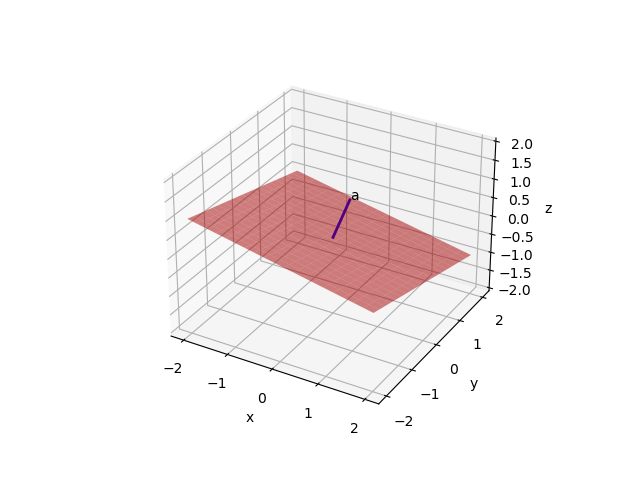

In [2]:
# plotting lines and planes

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(' ')
ax = plt.axes(projection="3d")    # set up for 3D work

a = np.array([1,1,4])/np.sqrt(18)   # make a unit vector

x = np.linspace(-2,2,20)
y = np.linspace(-2,2,20)
X, Y = np.meshgrid(x, y)   # make an (X,Y) grid on a small square

Z = (-a[0]*X - a[1]*Y)/a[2]  # height of points on plane perpendicular to a

ax.plot3D([0, a[0]], [0, a[1]], [0, a[2]],'b',linewidth=2)   # plot the a vector
ax.text3D(a[0], a[1], a[2], 'a')                             # label the a vector
ax.plot_surface(X, Y, Z, alpha=0.5, color='r')              # plot the plane perp to a

ax.grid('on')
ax.set_zlim(-2,2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

\begin{myfig}\label{fig:vperp} A unit vector and its perpendicular plane. \end{myfig}

There is a third way of computing the product of two vectors in $\maR^3$ that you may have encountered in your Physics course. In particular, the force on a current carrying wire in a magnetic field is proportional to the cross product of current and field. This fact is exploited in the design of the motor in Figure \ref{fig:motor}.

In [2]:
# animate a current carrying loop in a magnetic field

%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *

plt.ioff()
fig = plt.figure(' ')

ax = plt.axes(projection="3d")

theta = np.pi/3
s = np.sin(theta)
c = np.cos(theta)

x = np.array([-1,1,1,-1,-1])
y = np.array([1,1,-1,-1,1])
z = np.array([-1,-1,1,1,-1])

Ix = np.array([-0.8, -1, -0.8])
Iy = np.array([1, 1, 1])
Iz = np.array([-1.1, -1, -0.9])

I, = ax.plot3D(Ix, s*Iy, c*Iz, 'b')

wire, = ax.plot3D(x,s*y,c*z, 'b')
Blo, = ax.plot3D([0, 0, 0.1, 0, -0.1], [s, s+1, s+0.8, s+1, s+0.8], [-c, -c, -c, -c, -c], 'r') 
Flo, = ax.plot3D([0, 0, 0.1, 0, -0.1], [s, s, s, s, s], [-c, -c-1, -c-0.8, -c-1, -c-0.8], 'g')
Bhi, = ax.plot3D([0, 0, 0.1, 0, -0.1], [-s, -s+1, -s+0.8, -s+1, -s+0.8], [c, c, c, c, c], 'r') 
Fhi, = ax.plot3D([0, 0, 0.1, 0, -0.1], [-s, -s, -s, -s, -s], [c, c+1, c+0.8, c+1, c+0.8], 'g')

ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.axis('off')

thetaS=widgets.FloatSlider(min=-np.pi, max=np.pi, step=0.1, value=np.pi/3, description='$\\theta$')

def update( theta=thetaS ):
    s = np.sin(theta)
    c = np.cos(theta)
    wire.set_data_3d(x, s*y, c*z)
    I.set_data_3d(np.sign(theta)*Ix, s*Iy, c*Iz)
    Blo.set_data_3d([0, 0, 0.1, 0, -0.1], [s, s+1, s+0.8, s+1, s+0.8], [-c, -c, -c, -c, -c])
    Flo.set_data_3d([0, 0, 0.1, 0, -0.1], [s, s, s, s, s], [-c, -c-np.sign(theta), -c-np.sign(theta)*0.8, -c-np.sign(theta), -c-np.sign(theta)*0.8])
    Bhi.set_data_3d([0, 0, 0.1, 0, -0.1], [-s, -s+1, -s+0.8, -s+1, -s+0.8], [c, c, c, c, c])
    Fhi.set_data_3d([0, 0, 0.1, 0, -0.1], [-s, -s, -s, -s, -s], [c, c+np.sign(theta), c+np.sign(theta)*0.8, c+np.sign(theta), c+np.sign(theta)*0.8])
    fig.canvas.draw_idle()

widgets.interactive(update)
layoutS = widgets.Layout(display='flex', flex_flow='column', justify_content='center')
controls = widgets.VBox([thetaS], layout = layoutS)
widgets.HBox([fig.canvas, controls])

\begin{myfig}\label{fig:motor} A simple motor. The blue current flowing in the wire subject to the red magnetic field feels a green force proportional to the cross product the current vector and the magnetic field. Please observe the direction of this force as you rotate the wire by angle $\theta$. Do you see that (blue, red, green) is right-handed? In order to keep this wire spinning engineers have constructed a commutator that switches the direction of the current as $\theta$ crosses 0. Do you see that this then also switches the direction of the force? \end{myfig}

The **cross product**  of $u$ and $v$ is written
$u\times v$ and defined as the matrix vector product

\begin{equation}\label{eq:Xdef}
  u\times v \equiv \ttX(u)v =
  \begin{bmatrix} 0 & -u_2 & u_1 \\
                  u_2 & 0 & -u_0 \\
                  -u_1 & u_0 & 0 \end{bmatrix}
  \begin{bmatrix} v_0 \\ v_1 \\ v_2 \end{bmatrix}
  = \begin{bmatrix} -u_2v_1 + u_1v_2 \\ u_2v_0-u_0v_2 \\ -u_1v_0+u_0v_1 
    \end{bmatrix}  
\end{equation}

The next exercise develops the key properties of the cross product - as illustrated in Figure \ref{fig:crossp}.

\begin{exercise}\label{ex:CP0}
(a) Show that $u^T(u\times v)=0$ and $v^T(u\times v)=0$ and conclude that $u\times v$ is perpendicular to the plane containing $u$ and $v$.

(b) Confirm that $\ttX(u)^T=-\ttX(u)$ and that $\ttX(u)^2=uu^T-\|u\|^2I$.

(c) Use (b) to derive
$
  \|u\times v\|^2 = \|u\|^2\|v\|^2 - (u^Tv)^2.
$

(d) If $\theta=\angle(u,v)$ is the angle from $u$ to $v$ use (c) and (\ref{eq:CSE}) to show that
$
  \|u\times v\| = \|u\|\|v\||\sin\theta|.
$

(e) Use (d) and the figure below to conclude that 
$\|u\times v\|$
is the area (base times height) of the parallelogram with sides $u$ and $v$.

(f) Use (e) and the figure below to conclude that $|w^T(u\times v)|$
is the volume (area of base times height) of the parallelepiped with 
sides $u,\ v$ and $w$. Hint: Let $u$ and $v$ define the base. Then
$u\times v$ is parallel to the height vector obtained by drawing
a perpendicular from $w$ to the base.

(g) Based on our work in the previous notebook we note that this parallelepiped is the image of the unit cube by the transformation

\begin{equation}\label{eq:Auvw}
 A = [u, v, w] = \begin{bmatrix} u_0 & v_0 & w_0 \\ u_1 & v_1 & w_1 \\ u_2 & v_2 & w_2 \end{bmatrix}
\end{equation}

As this image has volume $|w^T(u\times v)|$, if the determinant indeed measures volume change (as it did in the plane) then 

\begin{equation}\label{eq:det3}
   \det(A)=w^T(u\times v)
\end{equation}

should tell us how to compute the determinant of $A$. Show that if $w$ is perpendicular to $u$ and $v$ then $\det([u,v,w])=c\|w\|^2$ for some $c\in\maR$. Show that $c>0$ when $w$ points in the same direction as $u\times v$, while $c<0$ when $w$ points opposite to $u\times v$.

\end{exercise}

Your solution here.

\begin{exercise}\label{ex:cpdet3}
Given

\begin{equation*}
 u = \begin{bmatrix} 1 \\ 2 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 2 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 1 \\ 2 \end{bmatrix}
\end{equation*}

(a) Compute $u\times v$ by hand, via (\ref{eq:Xdef}), and check your work in python using np.cross(u,v)

(b) Compute $\det(A)$ by hand, via (\ref{eq:det3}), and check your work in python using np.linalg.det(A) and A=np.column_stack((u,v,w)) to set up $A$.


\end{exercise}

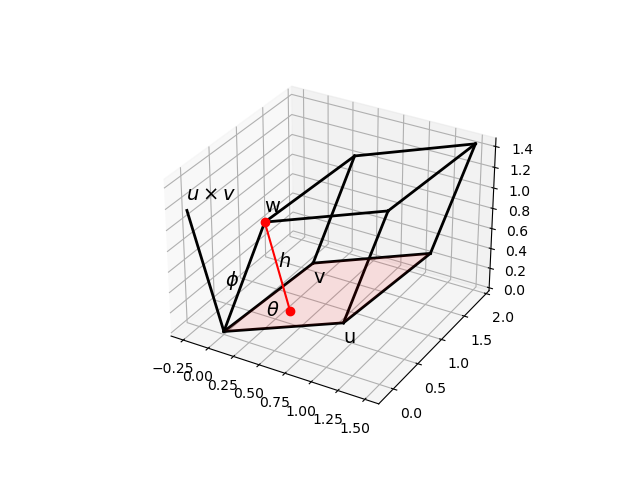

In [3]:
# cross product illustration
%matplotlib widget
import numpy as np                 # import math functions
import matplotlib.pyplot as plt    # import plot functions
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(' ')
ax = plt.axes(projection="3d")

x = np.array([1,1/3,1/4])

y = np.array([1/4,5/4,1/5])

xcy = np.cross(x.T,y.T);

z = x + y;

ax.plot3D([0, x[0]],[0, x[1]],[0, x[2]],'k',linewidth=2)

ax.text3D(x[0],x[1],x[2]-.2,'u',fontsize=14)
ax.text3D(y[0],y[1],y[2]-.2,'v',fontsize=14)
ax.text3D(0.2*z[0], 0.2*z[1], 0.2*z[2],'$\\theta$',fontsize=14)

ax.plot3D([0, y[0]],[0, y[1]],[0, y[2]],'k',linewidth=2)
ax.plot3D([y[0], z[0]],[y[1], z[1]],[y[2], z[2]],'k',linewidth=2)
ax.plot3D([x[0], z[0]],[x[1], z[1]],[x[2], z[2]],'k',linewidth=2)

ax.plot3D([0, xcy[0]],[0, xcy[1]],[0, xcy[2]],'k',linewidth=2)
ax.text3D(xcy[0],xcy[1],xcy[2]+.1,'$u\\times v$',fontsize=14)

w = np.array([1/4, 1/3, 1])
ax.plot3D([0, w[0]],[0, w[1]],[0, w[2]],'k',linewidth=2)
ax.text3D(w[0],w[1],w[2]+.1,'w',fontsize=14)
ax.plot3D([x[0], x[0]+w[0]],[x[1], x[1]+w[1]],[x[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0], y[0]+w[0]],[y[1], y[1]+w[1]],[y[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([z[0], z[0]+w[0]],[z[1], z[1]+w[1]],[z[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], x[0]+w[0]],[w[1], x[1]+w[1]],[w[2], x[2]+w[2]],'k',linewidth=2)
ax.plot3D([w[0], y[0]+w[0]],[w[1], y[1]+w[1]],[w[2], y[2]+w[2]],'k',linewidth=2)
ax.plot3D([y[0]+w[0], z[0]+w[0]],[y[1]+w[1], z[1]+w[1]],[y[2]+w[2], z[2]+w[2]],'k',linewidth=2)
ax.plot3D([x[0]+w[0], z[0]+w[0]],[x[1]+w[1], z[1]+w[1]],[x[2]+w[2], z[2]+w[2]],'k',linewidth=2)

# paint the base
Bx = [0, x[0], z[0], y[0]]   
By = [0, x[1], z[1], y[1]]    
Bz = [0, x[2], z[2], y[2]]    
verts = [list(zip(Bx, By, Bz))]
ax.add_collection3d(Poly3DCollection(verts, facecolor = 'r', alpha = 0.1))

# project w onto [u,v] plane to draw height
A = np.column_stack((x,y))
q, res, rank, s = np.linalg.lstsq(A, w, rcond=0)
Pw = A@q
ax.plot3D([w[0], Pw[0]], [w[1], Pw[1]], [w[2], Pw[2]], 'ro-')
m = (w+Pw)/2
ax.text3D(m[0], m[1], m[2], '$h$', fontsize=14)

#  build and label phi
p = 0.2*(xcy + w)
ax.text3D(p[0], p[1], p[2], '$\phi$', fontsize=14);


\begin{myfig}\label{fig:crossp} The geometry of the cross product. Here $\theta=\angle(u,v)$ and we note that $u\times v$ is perpendicular to the plane defined by $u$ and $v$. The actual *direction* of $u\times v$ is uniquely specified by the **right hand rule:** If, on your right hand, $u$ aligns with your index finger, $v$ with your middle finger, then $u\times v$ will align with your thumb. To facilitate the computation of volume of the parallelpiped we have shaded the base (light red), illustrated the height, $h$, and denoted by $\phi$ the angle between $w$ and $u\times v$. \end{myfig}

From the figure caption above and Exercise \ref{ex:CP0}(g) we deduce a criterion for right-handedness that will be very useful in coming sections.

\begin{proposition}\label{prop:frameOri} If $(u,v,w)$ is a collection of three vectors in $\maR^3$ and $w$ is perpendicular to both $u$ and $v$ then $(u,v,w)$ obeys the right-hand-rule if, and only if, $\det([u,v,w])>0$.
\end{proposition}

In the planar case, where the matrix $M=[u,v]$ expressed in terms of columns, we noted that $\det(M)$ vanished only $u$ and $v$ are colinear. In moving to our space setting, where $A=[u,v,w]$ we note from (\ref{eq:det3}) that $u\times v\ne 0$ if $u$ and $v$ are not colinear. If $u\times v\ne 0$ and it is perpendicular to the plane containing $u$ and $v$. As such, if $w$ does not lie in this plane then $w^T(u\times v)\ne 0$. Hence, if $u$ is not a multiple of $v$ and $w$ is not a linear combination of $u$ and $v$ then $\det([u,v,w])\ne 0$. These conditions on $u$, $v$, $w$ are more succinctly expressed in terms of 

\begin{definition}\label{def:LI}
We say that three vectors, $u$, $v$, $w$ in $\maR^3$ are **linearly independent** when the only numbers $c_0$, $c_1$, $c_2$ for which

\begin{equation}\label{eq:LI1}
  c_0u + c_1v + c_2w = 0
\end{equation}

is the triple of zeros $c_0=c_1=c_2=0$. If we lay these vectors into columns of $A=[u,v,w]$, and group the scalars into the column $c=[c_0,c_1,c_2]$ we notice that as $c_0u + c_1v + c_2w = Ac$ we arrive at the equivalent condition; $u$, $v$, $w$ in $\maR^3$ are **linearly independent** in $\maR^3$ when

\begin{equation}\label{eq:LI2}
  \hbox{the only } c \hbox{ for which } Ac=0 \hbox{ is the vector } c=0.
\end{equation}

Finally, given the discussion that prompted this definition, we arrive at the third equivalent condition; $u$, $v$, $w$ in $\maR^3$ are **linearly independent** in $\maR^3$ when

\begin{equation}\label{eq:LI3}
 \det([u,v,w]) \ne 0
\end{equation}

\end{definition}

\begin{exercise}\label{ex:LDex}
Use (\ref{eq:LI3}) and (\ref{eq:det3}) to determine whether or not 

\begin{equation*}
u = \begin{bmatrix} 0 \\ 1 \\ 1 \end{bmatrix}, \hskip 0.25in
 v = \begin{bmatrix} 1 \\ 1 \\ 0 \end{bmatrix}, \hskip 0.25in
 w = \begin{bmatrix} 1 \\ 0 \\ 1 \end{bmatrix}
\end{equation*}

are linearly independent.
\end{exercise}

This should help define the characteristc polynomial of $A=[u,v,w]$. 

\begin{equation}\label{eq:cpla}
  \eqalign{ \det(A-\la I) 
    &= (w-\la e_3)^T(u-\la e_1)\times(v-\la e_2) \cr
    &= (w-\la e_3)^T(u\times v - \la(e_1\times v-u\times e_2) + \la^2 e_1\times e_2) \cr
    &= w^T(u\times v) - \la(e_3^T(u\times v)+w^T(e_1\times v-u\times e_2)) + \la^2(e_3^T(e_1\times v-u\times e_2)+w^Te_1\times e_2) - \la^3e_3^T(e_1\times e_2) \cr
    &= \det(A) - \la(e_3^T(u\times v)+w^T(e_1\times v-u\times e_2)) + \la^2\tr(A) - \la^3 \cr}
\end{equation}

The eigenvalues, say $\la_1,\la_2,\la_3$, of $A$ are the roots of this cubic and so the Fundamental Theorem of Algebra requires

\begin{equation}\label{eq:cpla2}
  \det(A-\la I) = (\la_1-\la)(\la_2-\la)(\la_3-\la) = \la_1\la_2\la_3 - \la(\la_2\la_3+\la_1\la_3+\la_1\la_2) + \la^2(\la_1+\la_2+\la_3) - \la^3 
\end{equation}

On reconciling these expressions we find

\begin{proposition}\label{prop:detr3} if $A\in\maM_3(\maR)$ then $\tr(A)$ is the sum of its eigenvalues and $\det(A)$ is the product of its eigenvalues.
\end{proposition}

\begin{exercise}\label{ex:dtX}
With $X(u)$ the cross product matrix in (\ref{eq:Xdef}) please show that $\tr(X(u))=\det(X(u))=0$ and argue from there why one of the eigenvalues of $X(u)$ is zero while the other two are equal but opposite.
\end{exercise}


We also recall that the determinant of a product of 2-by-2 matrices is the product of their determinants. Let's confirm that here

\begin{proposition}\label{prop:detprod3} If $A\in\maM_3(\maR)$ and $B\in\maM_3(\maR)$ then $\det(AB)=\det(A)\det(B)$.
\end{proposition}

**Proof:** We express $A=[u,v,w]$ and $B=[x,y,z]$ and so $AB=[Ax,Ay,Az]$ so

\begin{equation}\label{eq:dp1}
  \eqalign{\det(AB) 
   &= (Az)^T(Ax\times Ay) \cr
   &= (Az)^T((x_1u+x_2v+x_3w)\times(y_1u+y_2v+y_3w)) \cr
   &= z^TA^T((x_1y_2-x_2y_1)(u\times v) + (x_1y_3-x_3y_1)(u\times w) + (x_2y_3-x_3y_2)(v\times w)) \cr
   &= z^T((x_1y_2-x_2y_1)w^T(u\times v) + (x_1y_3-x_3y_1)v^T(u\times w) + (x_2y_3-x_3y_2)u^T(v\times w)) \cr
   &= w^T(u\times v)z^T(x\times y) = \det(A)\det(B).\cr}
\end{equation}

**End of Proof.**








